In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

In [2]:
usa_ufos = pd.read_csv('../data/usa_ufos_clean2.csv', nrows = 132308,  encoding='unicode_escape')
usa_ufos.head()

,occurred,city,state,country,shape,summary,reported,posted,image
0,2/15/2024 14:20,SHEPHERDSVILLE,KY,USA,ORB,Several sightings over several years.,2/15/2024,2/15/2024,NaN
1,2/15/2024 6:21,GREENVILLE,SC,USA,CIRCLE,"Object moving slowing across the sky, suddenly...",2/15/2024,2/15/2024,NaN
2,2/14/2024 22:45,UNKNOWN,VA,USA,LIGHT,Standing to the west of this object it hung in...,2/15/2024,2/15/2024,NaN
3,2/14/2024 22:44,SOMERS,CT,USA,UNKNOWN,"Odd, flashing object I could only describe dur...",2/14/2024,2/15/2024,Y
4,2/14/2024 22:15,BOSCAWEN,NH,USA,LIGHT,Bright light in sky changing shape but almost ...,2/15/2024,2/15/2024,Y


In [3]:
shape_counts = usa_ufos['shape'].value_counts()
shape_counts = pd.DataFrame(shape_counts).reset_index()
shape_counts.columns = ['shape', 'count']

shape_counts.sort_values('count', ascending=False)
shape_counts

,shape,count
0,LIGHT,24664
1,CIRCLE,12763
2,TRIANGLE,11846
3,UNKNOWN,9023
4,FIREBALL,8980
5,OTHER,8874
6,DISK,7549
7,SPHERE,6752
8,OVAL,5649
9,ORB,5494


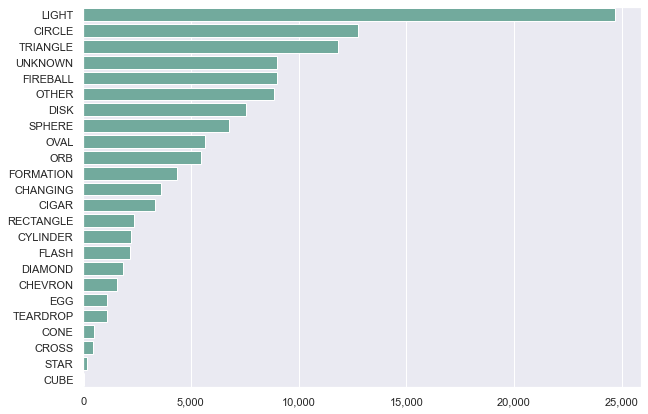

In [4]:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
ax = sns.barplot(
    x="count", 
    y='shape', 
    data=shape_counts, 
#   estimator=sum, 
    ci=None, 
    color='#69b3a2');
#plt.title('Shapes Observed')
#plt.xlabel('Total Number of Sightings')
#plt.ylabel('Total Number of Sightings')
ax.set(xlabel=None)
ax.set(ylabel=None);
ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.savefig('Shapes Observed', dpi=300)

In [10]:
times_df = pd.read_csv('../notebooks/ufo_times2.csv')
times_df.head()

,Unnamed: 0,occurred,city,state,country,shape,summary,reported,posted,image,occurred_date,occurred_time,occurred_year,occurred_month
0,0,2024-02-15 14:20:00,SHEPHERDSVILLE,KY,USA,ORB,Several sightings over several years.,2/15/2024,2/15/2024,NaN,2024-02-15,14:20:00,2024.0,2.0
1,1,2024-02-15 06:21:00,GREENVILLE,SC,USA,CIRCLE,"Object moving slowing across the sky, suddenly...",2/15/2024,2/15/2024,NaN,2024-02-15,06:21:00,2024.0,2.0
2,2,2024-02-14 22:45:00,UNKNOWN,VA,USA,LIGHT,Standing to the west of this object it hung in...,2/15/2024,2/15/2024,NaN,2024-02-14,22:45:00,2024.0,2.0
3,3,2024-02-14 22:44:00,SOMERS,CT,USA,UNKNOWN,"Odd, flashing object I could only describe dur...",2/14/2024,2/15/2024,Y,2024-02-14,22:44:00,2024.0,2.0
4,4,2024-02-14 22:15:00,BOSCAWEN,NH,USA,LIGHT,Bright light in sky changing shape but almost ...,2/15/2024,2/15/2024,Y,2024-02-14,22:15:00,2024.0,2.0


In [11]:
shape_year = times_df[['shape', 'occurred_year']]
shape_year.head()

,shape,occurred_year
0,ORB,2024.0
1,CIRCLE,2024.0
2,LIGHT,2024.0
3,UNKNOWN,2024.0
4,LIGHT,2024.0


In [64]:
shape_year_gr = shape_year.groupby(['shape','occurred_year'])['shape'].count()
shape_year_gr = shape_year_gr.reset_index(name = 'count')
#shape_year_gr.columns = ['shape', 'occurred_year', 'count']
shape_year_gr = shape_year_gr[shape_year_gr['occurred_year'] >= 1994]
shape_year_gr = shape_year_gr[shape_year_gr['shape'].isin(['LIGHT', 'CIRCLE', 'TRIANGLE', 'FIREBALL', 'OTHER'])]
shape_year_gr

,shape,occurred_year,count
259,CIRCLE,1994.0,27
260,CIRCLE,1995.0,45
261,CIRCLE,1996.0,35
262,CIRCLE,1997.0,72
263,CIRCLE,1998.0,127
...,...,...,...
1493,TRIANGLE,2020.0,421
1494,TRIANGLE,2021.0,223
1495,TRIANGLE,2022.0,321
1496,TRIANGLE,2023.0,216


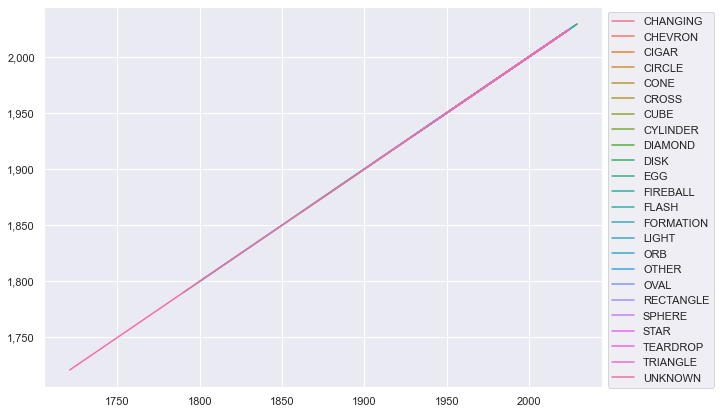

In [54]:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

#set palette
#sns.set_palette("muted")

ax = sns.lineplot(data=shape_year_gr, x='occurred_year', y='occurred_year', hue='shape')
;

#plt.title('Scooters in Use per Company per Day May 1 - July 31 2019')
ax.set(title=None)
ax.set(xlabel=None)
ax.set(ylabel=None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title=None)

ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
#ax.set_xticklabels(('May 1', 'May 15', 'Jun 1', 'Jun 15', 'Jul 1', 'Jul 15', 'Aug 1'))

#plt.savefig('Scooters in Use per Company per Day')

In [26]:
shape_year_gr = pd.DataFrame(shape_year_gr).reset_index()
#shape_counts.columns = ['shape', 'count']
shape_year_gr

ValueError: cannot insert shape, already exists